In [ ]:
# Import libraries and datasets
import numpy as np
import pandas as pd
!pip install chardet
import chardet

with open("spotify-2023.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

df_spotify = pd.read_csv("spotify-2023.csv", encoding=encoding)
df_spotify.head(10)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


# **Choosing Data for Clustering**
# Creating K-means Function


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# FUNCTION: Group Assignment
def group_assignment(data,centroids):
  grouping_vec_c = np.zeros(len(data))
  for i in range(len(data)):
    dist = np.zeros(len(centroids))
    for j in range(len(centroids)):
      dist[j] = np.linalg.norm(data[i] - centroids[j])
      min_dist = min(dist)
    for j in range(len(centroids)):
      if min_dist == dist[j]:
        grouping_vec_c[i] = j+1
  return grouping_vec_c


In [ ]:
# FUNCTION: Update representatives/centroids
def update_centroid(data, grouping, centroids):
  new_centroids = [];
  for i in range(len(centroids)):
    cent = np.zeros(len(data[0]))
    count = 0
    for j in range(len(data)):
      if grouping[j] == (i+1):
        cent = cent+data[j]
        count += 1
    group_average = cent/count
    new_centroids.append(group_average)
  return new_centroids

In [ ]:
# FUNCTION: Calculating the clustering objective
def clustering_objective(data, grouping, centroids):
  J_obj = 0
  for i in range(len(data)):
    for j in range(len(centroids)):
      if grouping[i] == (j+1):
        J_obj += np.linalg.norm(data[i] - centroids[j])**2
  J_obj = J_obj/len(data)
  return J_obj

In [ ]:
# FUNCTION: Run the k-means algorithm
def Kmeans_alg(data, centroids):
  iteration = 0
  J_obj_vector = []
  Stop = False
  while Stop == False:
    grouping = group_assignment(data, centroids)
    new_centroids = update_centroid(data, grouping, centroids)
    J_obj = clustering_objective(data, grouping, new_centroids)
    J_obj_vector.append(J_obj)
    iteration += 1
    if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
      Stop = True
    else:
      centroids = new_centroids
  return new_centroids, grouping, J_obj_vector, iteration

In [ ]:
# Check if missing values in audio features
missing_values = df_spotify.isnull().sum()
print(missing_values)

# Remove columns with missing values
columns_to_remove = ['in_shazam_charts', 'key']
df_spotify = df_spotify.drop(columns=columns_to_remove)
print(df_spotify.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
b

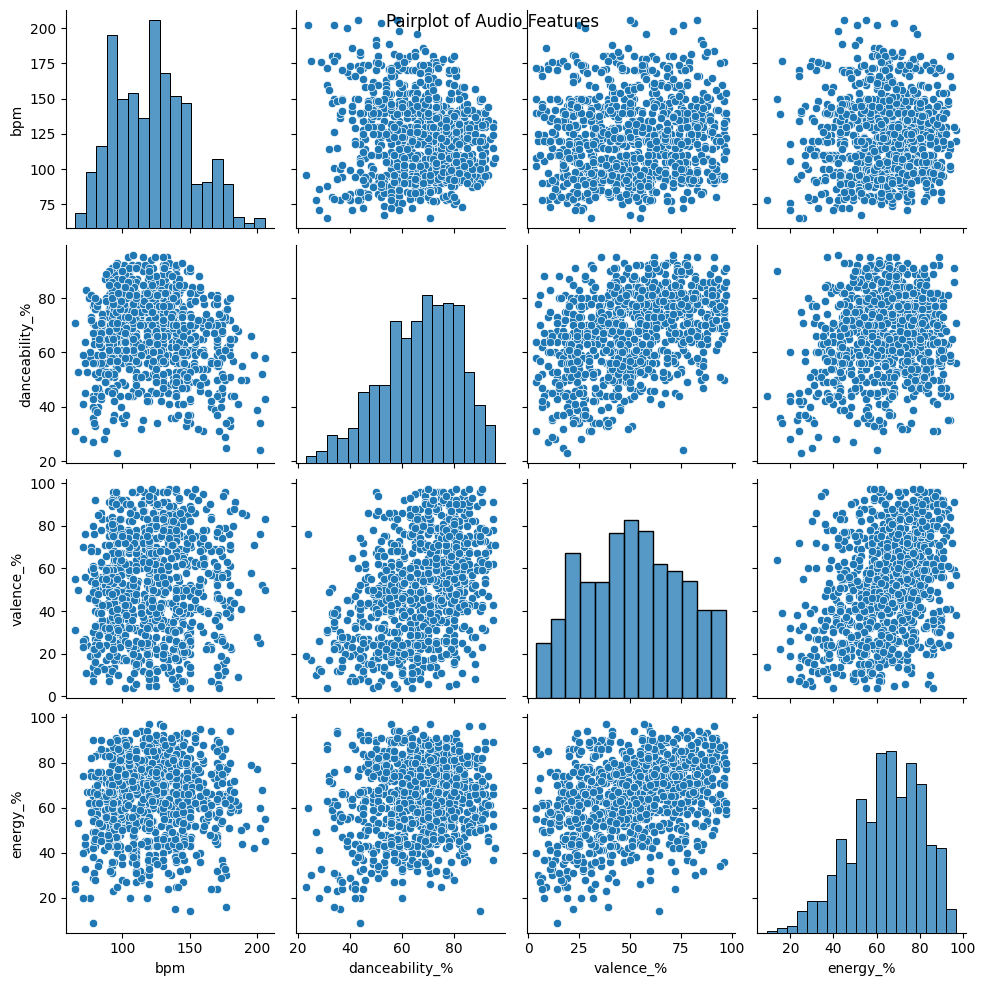

In [ ]:
from sklearn import preprocessing

# First selecting four audio features to apply K-means clustering
audio_features_updated = df_spotify[['bpm', 'danceability_%', 'valence_%', 'energy_%']]

# Visualizing the chosen data
sns.pairplot(audio_features_updated)
plt.suptitle('Pairplot of Audio Features')
plt.show()

X_2 = audio_features_updated
X_norm_2 = preprocessing.normalize(X_2)

[0.02518269098643106, 0.021466782680121657, 0.02061933073329767, 0.02014886023187777, 0.01981852258096254, 0.019426880369705034, 0.018938261057159622, 0.018720534419494197, 0.01848564060621271, 0.018220006473891506, 0.017943322633243244, 0.017700717892451916, 0.017533496719319433, 0.01744327159371012, 0.01737774107574086, 0.017325262655764298, 0.01728152142675771, 0.017255431274183285, 0.017238307463841192, 0.017217256679585194, 0.01718637519147384, 0.01716106077099545, 0.01713992221816126, 0.017130786122565956, 0.01712318271262198, 0.01711998866494347, 0.0171177821846171, 0.017117547633721003, 0.017116614378983763, 0.017114125596599677, 0.017113263743512006, 0.017112749737446684, 0.017111712396880543, 0.017111184519329865, 0.017111184519329865]
35


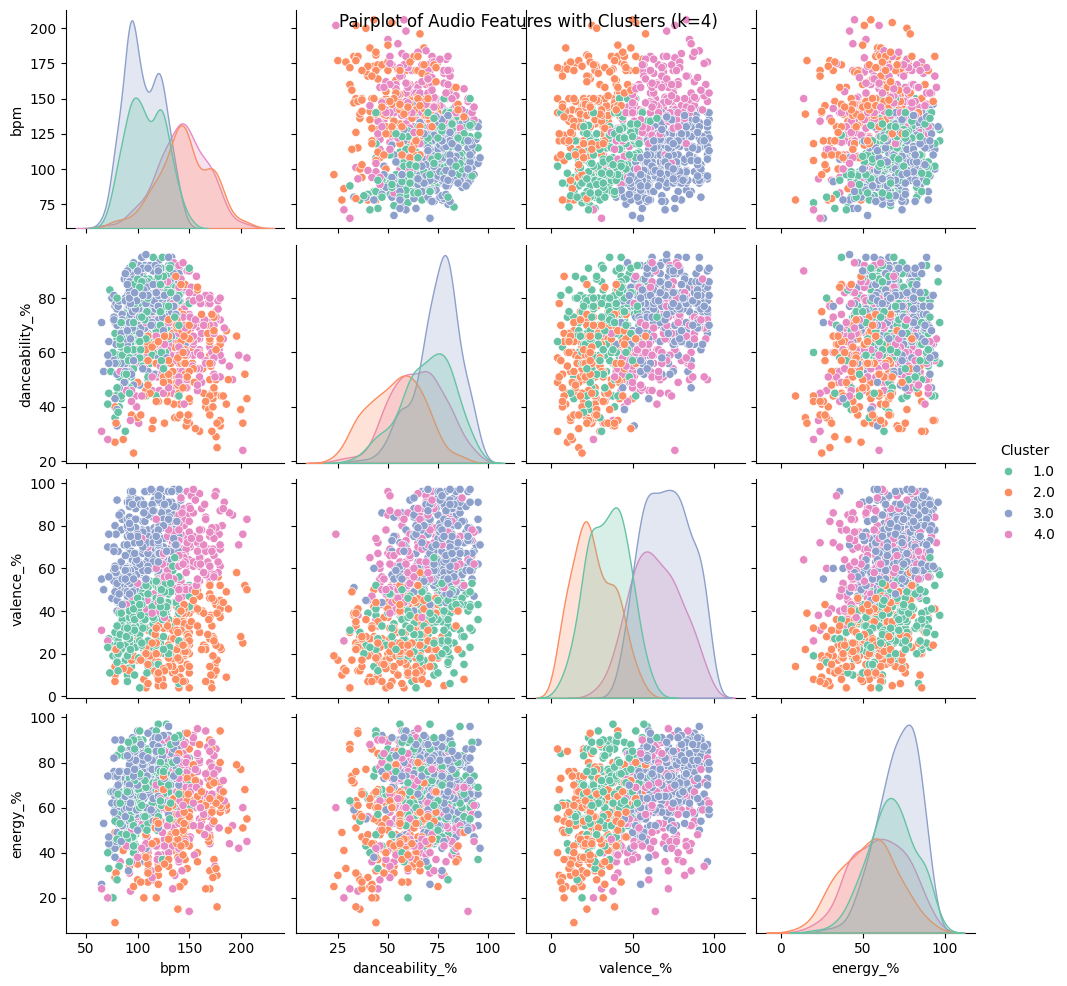

In [ ]:
# Choosing representatives at random (k=4)
index_2=np.random.randint(200, size=4)
reps_2=np.array([X_norm_2[index_2[0]], X_norm_2[index_2[1]], X_norm_2[index_2[2]], X_norm_2[index_2[3]]])

# Running k-means algorithm
[new_centroids, grouping, J_obj_vector, iteration] = Kmeans_alg(X_norm_2,reps_2)
print(J_obj_vector)
print(iteration)

# Add cluster labels to the original dataset
audio_features_clustered = audio_features_updated.copy()
audio_features_clustered['Cluster'] = grouping

# Visualizing clusters obtained
labels = audio_features_clustered['Cluster']
sns.pairplot(audio_features_clustered, hue='Cluster', palette='Set2')
plt.suptitle(f'Pairplot of Audio Features with Clusters (k={len(new_centroids)})')
plt.show()

The data is larger than two dimensions, which makes it difficult to assess what  vectors are clustered together. Thus, this project will focus on two audio features/dimensions to clearly visualize the clusters and patterns between Spotify songs.

# **K-means Clustering**
The choice of **danceability** and **energy** for this project is based on their positive correlation and their significance in characterizing the musical experience.
1. *Positive Correlation:* Songs with higher energy levels tend to be more danceable, creating an engaging and lively listening experience. This positive correlation suggests that as the energy of a song increases, its danceability is likely to increase as well.
2. *User Engagement:* Danceability and energy are two key factors that contribute to user engagement with music. People often seek energetic and danceable songs for various occasions, such as workouts, parties, or just for enjoyment. Recommending songs based on these features can align with user preferences for lively and dynamic music.
3. *Genre Characteristics:* Different music genres are often associated with specific levels of danceability and energy. For example, dance and electronic genres typically have high danceability and energy, while ballads may have lower values. Clustering songs based on these features can potentially unveil genre patterns within the data.



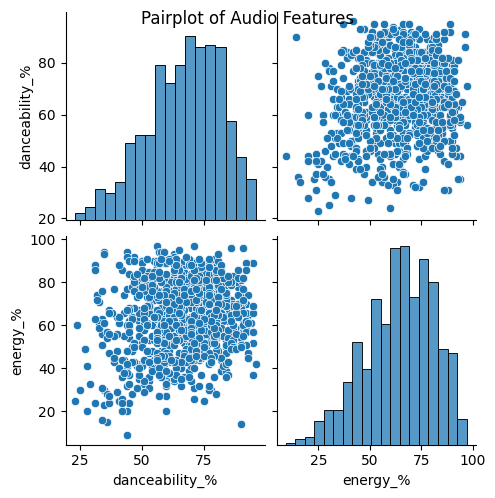

[[80 83]
 [71 74]
 [51 53]
 ...
 [80 67]
 [82 77]
 [61 67]]


In [ ]:
# Select audio features to use for clustering
audio_features = df_spotify[['danceability_%', 'energy_%']]

sns.pairplot(audio_features)
plt.suptitle('Pairplot of Audio Features')
plt.show()

# Converting the dataframe to a matrix
feature_matrix = audio_features.values
print(feature_matrix)

In [ ]:
X = audio_features
X_norm = preprocessing.normalize(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

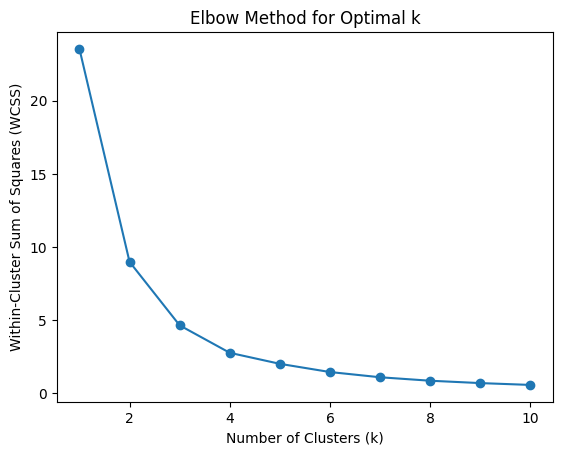

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Using the Elbow method, I concluded that the elbow was at K=4 because the plot becomes nearly linear
at that point.

[0.008131187303908117, 0.005132906589666124, 0.004014549698016073, 0.003578154591390636, 0.0032714540715824032, 0.00310645666607775, 0.0030001218604152474, 0.0029635177863350536, 0.0029456962657760195, 0.0029357129266062852, 0.002924001603867735, 0.002910618926290642, 0.0029055430697769976, 0.0029037932646807144, 0.002901538998837628, 0.0029004299327945494, 0.002899258867003023, 0.0028987850904459915, 0.002898527528070388, 0.002898527528070388]
20


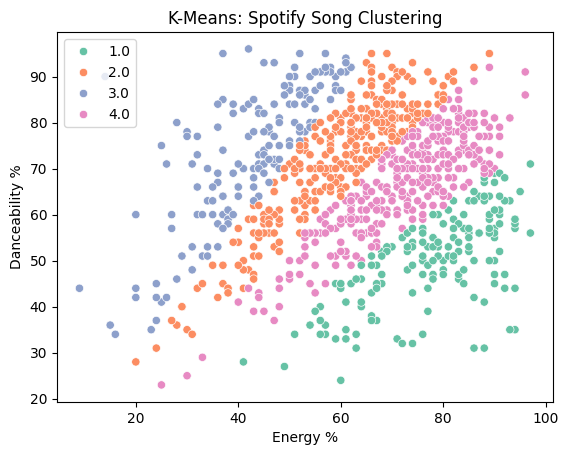

In [ ]:
# Choosing representatives at random (k=4)
index=np.random.randint(200, size=4)
reps=np.array([X_norm[index[0]], X_norm[index[1]], X_norm[index[2]], X_norm[index[3]]])

# Running k-means algorithm
[new_centroids, grouping, J_obj_vector, iteration] = Kmeans_alg(X_norm,reps)
print(J_obj_vector)
print(iteration)

# Visualizing clusters obtained
labels=grouping
sns.scatterplot(data = X, x = 'energy_%', y = 'danceability_%', hue = grouping, palette="Set2", legend='full');
plt.title('K-Means: Spotify Song Clustering')
plt.xlabel('Energy %')
plt.ylabel('Danceability %')
plt.legend()
plt.show()

# **Interpretation of Data**
	The scatterplot portrays four clusters (blue, pink, orange, and green) that are categorized by danceability and energy levels of the songs. The blue (3rd) cluster grouped songs that seem to have the highest danceability-to-energy percentage ratio and appears to have the highest positive slope: as the energy level increases, the danceability level increases. The pink (4th) cluster grouped songs that also have a high danceability-to-energy percentage ratio, yet with generally greater energy percentages than the blue cluster. The orange (2nd) cluster shows a similar pattern: the clustered songs still show a positive correlation between energy and danceability levels, but however, the positive danceability-to-energy percentage ratio has decreased (the slope is not as steep), representing a group of songs with a higher energy percentage. Lastly, the green (1st) cluster has grouped songs with the lowest danceability-to-energy percentage ratio with higher energy percentages and lower danceability percentages.

# **Song Recommendations**
The "recommend_songs" function provides personalized song recommendations to a user based on a song that they selected from the dataset. It takes information about a user-selected song as its input (danceability and energy), determines which cluster the user's selected song belongs to by comparing the danceability and energy of the user's song with the clusters formed, and then suggests other songs from the same cluster as recommendations. These recommended songs are likely to have similar musical vibes, including danceability and energy levels.

In [ ]:
# Function to recommend songs based on user-selected song
def recommend_songs(user_selected_song, df_spotify, features=['danceability_%', 'energy_%'], optimal_k=4, num_recommendations=5):
    # Create a DataFrame with selected features
    selected_features = df_spotify[features]

    # Normalize the feature matrix
    X_norm = preprocessing.normalize(selected_features)

    # Choosing representatives at random (k=optimal_k)
    index = np.random.randint(len(X_norm), size=optimal_k)
    reps = np.array([X_norm[index[i]] for i in range(optimal_k)])

    # Running custom k-means algorithm
    new_centroids, grouping, J_obj_vector, iteration = Kmeans_alg(X_norm, reps)

    # Add the 'Cluster' column to the original DataFrame
    df_spotify['Cluster'] = grouping

    # Predict the cluster for the user-selected song
    user_selected_cluster = int(group_assignment(np.array([user_selected_song[features].values]), new_centroids)[0])

    # Filter songs from the same cluster as the user-selected song
    cluster_songs = df_spotify[df_spotify['Cluster'] == user_selected_cluster]

    # Exclude the user-selected song from recommendations
    cluster_songs = cluster_songs[cluster_songs['track_name'] != user_selected_song['track_name'].values[0]]

    # Recommend songs from the same cluster
    recommended_songs = cluster_songs.sample(num_recommendations)

    return recommended_songs[['track_name', 'artist(s)_name']]

In [ ]:
# Example Usage:
user_selected_song = df_spotify.sample(1)

# Use the function to get song recommendations
song_recommendation = recommend_songs(user_selected_song, df_spotify)

# Display recommendations
print("User's Selected Song:")
print(user_selected_song[['track_name', 'artist(s)_name']])
print("\nRecommended Songs:")
print(song_recommendation)

User's Selected Song:
    track_name artist(s)_name
701   Envolver         Anitta

Recommended Songs:
           track_name                    artist(s)_name
911            Sparks                          Coldplay
669  Forgot About Dre                   Eminem, Dr. Dre
231           CUFF IT                          Beyoncï¿
735    Wait a Minute!                            Willow
892        El Rescate  Grupo Marca Registrada, Junior H
